In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import nltk
import string

In [2]:
# Create a SQL connection to our SQLite database
con = sqlite3.connect('E:\Data Analysis\Amazon text analysis/database.sqlite')

In [4]:
 df = pd.read_sql_query("SELECT * FROM Reviews", con)

In [5]:
#Sentimental analysis

In [6]:
from textblob import TextBlob

In [7]:
polarity=[] # list which will contain the polarity of the comments

for i in df['Summary']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)   
    except:
        polarity.append(0)

In [8]:
data=df.copy()

In [9]:
data['polarity']=polarity

In [10]:
#Lets perform EDA for the Positve sentences

In [11]:
df1 = data[0:2000]

In [12]:
df1

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.70
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.00
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.00
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.00
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.80
...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,B001E5E29A,A3IJNH61DY5N9K,Sharon Allan,10,11,5,1265846400,Great Waffles for us non-cooks,I have to laugh at the reviews that said it wa...,0.80
1996,1997,B001E5E29A,A35W3JQYP0M655,"Ambergris ""John Thomas""",7,7,5,1279929600,Excellent Fluffy Pancakes.....,I had read some favorable reviews of this panc...,0.40
1997,1998,B001E5E29A,A3CLWZGMC7M9Z1,"Hippie2MARS ""Hippie2MARS""",6,6,4,1250640000,Good Basic Mix,I was expecting great things based on the revi...,0.35
1998,1999,B001E5E29A,A2V6P1FKRHCVQQ,S. Jackson,8,9,4,1265760000,"Good pancakes, lots of work",I love this pancake mix. I bought my first ca...,0.70


In [13]:
from wordcloud import WordCloud, STOPWORDS

In [14]:
stopwords=set(STOPWORDS)

In [16]:
positive = df1[df1['polarity']>0]

In [17]:
total_text= (' '.join(positive['Summary']))

In [18]:
total_text

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [19]:
import re
total_text=re.sub('[^a-zA-Z]',' ',total_text)
total_text=re.sub(' +',' ',total_text)

In [20]:
len(total_text)

27982

(-0.5, 999.5, 499.5, -0.5)

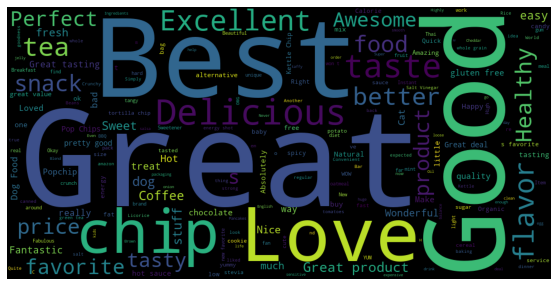

In [21]:
wordcloud = WordCloud(width = 1000, height = 500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [23]:
negative = df1[df1['polarity']<0]
negative

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,polarity
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,-0.400000
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",-1.000000
57,58,B004N5KULM,ASCNNAJU6SXF8,S. Beck,1,1,5,1336176000,How can you go wrong!,"It is chocolate, what can I say. Great variet...",-0.625000
61,62,B004N5KULM,A7ZK2A3VIW7X9,Peggy,0,2,5,1319414400,pretty expensive,"This bag of candy online is pretty expensive, ...",-0.125000
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...,-0.500000
...,...,...,...,...,...,...,...,...,...,...,...
1957,1958,B001HBTGI8,A2ZKYNZ52F3W2S,Michael L. Neeser,1,2,1,1319241600,Not really olive juice,Ordered this a few months ago only to find it ...,-0.100000
1958,1959,B001HBTGI8,A3PGAEF216LDQU,tyg3rstyl3,0,1,2,1327276800,It's not worth it!,This product is simply for cheap liquor since ...,-0.187500
1960,1961,B00473VNHK,ASRXS63OHE00O,Rachel Ling,1,2,2,1296259200,Hard to control the quantity.,Sea salt is more easily administered with a sa...,-0.291667
1980,1981,B005HGAVGA,AR9LDSE6KWVNO,Buck,0,0,1,1327881600,Disappointing,My husband just bought a Keurig coffe maker. I...,-0.600000


In [24]:
negative_text= (' '.join(negative['Summary']))

In [25]:
negative_text=re.sub('[^a-zA-Z]',' ',negative_text)
negative_text=re.sub(' +',' ',negative_text)

(-0.5, 999.5, 499.5, -0.5)

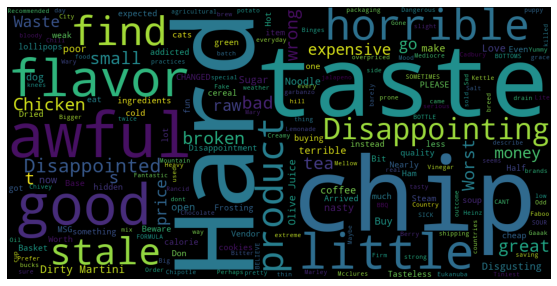

In [27]:
wordcloud1 = WordCloud(width = 1000, height = 500,stopwords=stopwords).generate(negative_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud1)
plt.axis('off')

In [28]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [29]:
#Analyse to what user amazon can recommend more product
row = df.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by = 'Text', ascending = False)

In [30]:
row.columns=['Num summaries','num text','avg score','num purchase']

In [31]:
row

,Num summaries,num text,avg score,num purchase
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
...,...,...,...,...
A2HROKQO0GA5AF,1,1,3.000000,1
A2HROR28DMJV2W,1,1,5.000000,1
A2HRR8CO2Y20G8,1,1,5.000000,1


Text(0.5, 1.0, 'Top 10 purchaser')

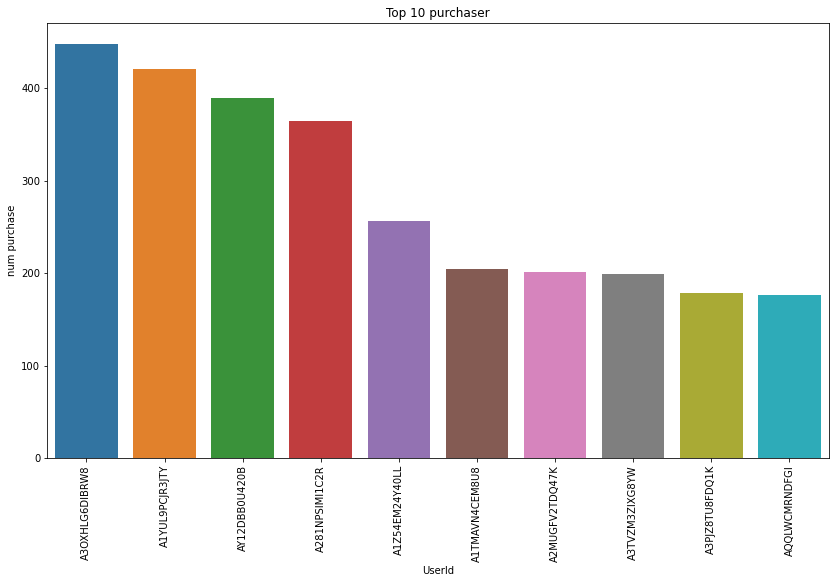

In [36]:
plt.figure(figsize =(14,8))
sns.barplot(x =row.index[0:10], y ='num purchase',data =row[0:10] )
plt.xticks(rotation = 'vertical')
plt.title('Top 10 purchaser')

In [37]:
#Analyse length of comments whether customer are going to give length comments or short one


In [41]:
df1.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
polarity                  0
dtype: int64

In [42]:
df1.duplicated().sum()

0

In [43]:
df1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


In [48]:
def len_calc(text):
    return len(text.split(' '))

In [49]:
df1['text_len'] = df1['Text'].apply(len_calc)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_13052\2642978944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text_len'] = df1['Text'].apply(len_calc)


In [50]:
df1['text_len']

0        49
1        31
2        99
3        43
4        30
       ... 
1995     94
1996    346
1997     52
1998     88
1999     29
Name: text_len, Length: 2000, dtype: int64

In [51]:
import plotly.express as px

In [53]:
px.box(df1, y= 'text_len', title ='Visualisation of length of comments')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Visualisation of score')

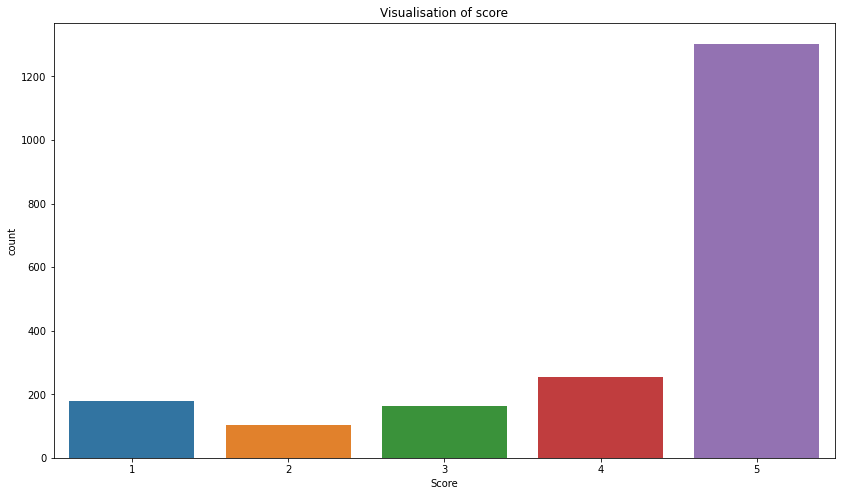

In [55]:
#Analyse score
plt.figure(figsize = (14,8))
sns.countplot(df1['Score'])
plt.title('Visualisation of score')

In [56]:
#Analysis of behavior of customer


In [57]:
df1['Text'] = df1['Text'].str.lower()

C:\Users\Vishal\AppData\Local\Temp\ipykernel_13052\395660935.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
punctuations = string.punctuation

In [59]:
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
def remove_punc(text):
    no_punc = ''
    for char in text:
        if punctuations not in char:
            no_punc = no_punc+char
    return no_punc
        

In [61]:
df1['Text'] = df1['Text'].apply(remove_punc)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_13052\764668079.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vishal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [74]:
def remove_stopwords(tex):
    return ' '.join([word for word in tex.split(' ') if word not in set(stopwords.words('english'))])

In [75]:
df1['Text'] = df1['Text'].apply(remove_stopwords)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_13052\3600568732.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
df1['Text'] 

0       bought several vitality canned dog food produc...
1       product arrived labeled jumbo salted peanuts.....
2       confection around centuries.  light, pillowy c...
3       looking secret ingredient robitussin believe f...
4       great taffy great price.  wide assortment yumm...
                              ...                        
1995    laugh reviews said much work.  add egg & littl...
1996    read favorable reviews pancake mix amazon quit...
1997    expecting great things based reviews. good, gr...
1998    love pancake mix.  bought first whole foods ma...
1999    say??  wonderful, highlight weekend.  ohhhhhh ...
Name: Text, Length: 2000, dtype: object

In [77]:
def remove_urls(tex):
    url_pattern =re.compile(r'href|http.\w+')
    return url_pattern.sub(r'', tex)

In [78]:
df1['Text'] = df1['Text'].apply(remove_urls)

C:\Users\Vishal\AppData\Local\Temp\ipykernel_13052\1006589326.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
len(df1['Text'])

2000

In [80]:
for i in range(len(df1['Text'])):
    df1['Text'][i]=df1['Text'][i].replace('br','')

C:\Users\Vishal\AppData\Local\Temp\ipykernel_13052\1891660341.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
comment_words = '' 
for val in df1['Text']:
    # typecaste each val to string
    
    # split the value 
    tokens = val.split() 
    
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words=comment_words+ " ".join(tokens)+" "

In [83]:
comment_words

'bought several vitality canned dog food products found good quality. product looks like stew processed meat smells better. laador finicky appreciates product better most. product arrived labeled jumbo salted peanuts...the peanuts actually small sized unsalted. sure error vendor intended represent product "jumbo". confection around centuries. light, pillowy citrus gelatin nuts - case filberts. cut tiny squares liberally coated powdered sugar. tiny mouthful heaven. chewy, flavorful. highly recommend yummy treat. familiar story c.s. lewis\' "the lion, witch, wardrobe" - treat seduces edmund selling other sisters witch. looking secret ingredient robitussin believe found it. got addition root beer extract ordered (which good) made cherry soda. flavor medicinal. great taffy great price. wide assortment yummy taffy. delivery quick. taffy lover, deal. got wild hair taffy ordered five pound bag. taffy enjoyable many flavors: watermelon, root beer, melon, peppermint, grape, etc. complaint bit m

In [84]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

(-0.5, 799.5, 799.5, -0.5)

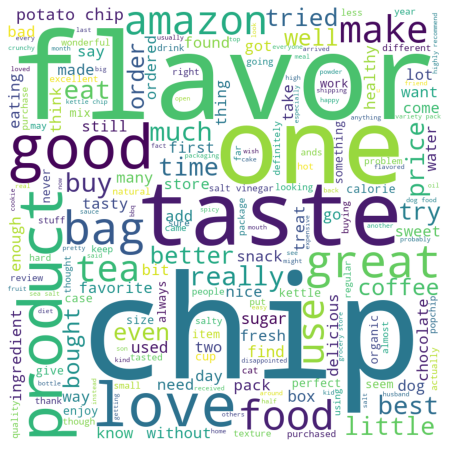

In [85]:
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 